<a href="https://colab.research.google.com/github/Abi-Lowkey/MachineLearningTasks/blob/main/5thWeekTasks/Reproduce_dan_Pahami_EDA_with_ordinary_linear_regression_and_linear_regression_with_a_function_basis_then_compare_the_results_(RMSE%2C_MSE%2C_RSquared%2C_etc_)_on_data_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama  : Ketut Satria Wibisana

NIM   : 1103213148

Lecture Week 5 : Reproduce dan pahami EDA

Dataset : data.csv

Dokumentasi Chat GPT : [Link](https://chatgpt.com/share/67247b11-8e48-8002-9c70-f1f2bbe31b57)

Prompt: Beri kode untuk connect gcolab dengan gdrive!

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Prompt: Beri kode untuk read dataset sebagai dataframe!

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [6]:


# Ganti 'path_to_your_file.csv' dengan path lengkap dari file Anda di Google Drive
file_path = '/content/drive/MyDrive/Dataset/data.csv'

# Membaca dataset sebagai DataFrame
df = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama untuk memastikan berhasil
df.head()



,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [9]:
# Menampilkan informasi dasar tentang DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [10]:
df.tail(5)                        # To display the botton 5 rows

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [13]:
# Menampilkan tipe data dari setiap kolom dalam DataFrame
print("Tipe Data Setiap Kolom:")
print(df.dtypes)

Tipe Data Setiap Kolom:
Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object


Prompt: saya mempunyai data dengan output df.head dan df.info seperti diatas, buatlah model regresi linear biasa (RMSE,MSE,RSquared,etc)

In [15]:
# Imputasi nilai-nilai null
df['Engine Fuel Type'].fillna(df['Engine Fuel Type'].mode()[0], inplace=True)
df['Engine HP'].fillna(df['Engine HP'].mean(), inplace=True)
df['Engine Cylinders'].fillna(df['Engine Cylinders'].mean(), inplace=True)
df['Number of Doors'].fillna(df['Number of Doors'].mean(), inplace=True)
df['Market Category'].fillna('Unknown', inplace=True)

<ipython-input-15-3096ee6c191b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Engine Fuel Type'].fillna(df['Engine Fuel Type'].mode()[0], inplace=True)
<ipython-input-15-3096ee6c191b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(va

In [16]:
# Memisahkan fitur dan target
X = df.drop(columns=['MSRP'])
y = df['MSRP']

In [22]:
# Identifikasi kolom numerik dan kategorikal
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(exclude=['object']).columns


In [24]:
## Membuat pipeline model regresi linear
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [25]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melatih model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  Index(['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors',
       'highway MPG', 'city mpg', 'Popularity'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  Index(['Make', 'Model', 'Engine Fuel Type', 'Transmission Type',
       'Driven_Wheels', 'Market Category', 'Vehicle Size', 'Vehicle Style'],
      dtype='object'))])),
                ('regressor', LinearRegression())])

In [26]:
# Memprediksi data uji
y_pred = pipeline.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [27]:
# Menghitung metrik evaluasi
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [28]:
# Menampilkan hasil evaluasi
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared (R2): {r2:.2f}')

Mean Squared Error (MSE): 146948805.61
Root Mean Squared Error (RMSE): 12122.24
Mean Absolute Error (MAE): 6111.16
R-squared (R2): 0.94


Prompt: dengan output df.head dan df.info seperti diatas,buatkan  regresi linear dengan basis fungsi lalu bandingkan hasilnya (RMSE,MSE,RSquared,etc)

In [29]:
# Contoh data df (data awal Anda dengan nilai null telah diimputasi)
# Imputasi nilai-nilai null
df['Engine Fuel Type'].fillna(df['Engine Fuel Type'].mode()[0], inplace=True)
df['Engine HP'].fillna(df['Engine HP'].mean(), inplace=True)
df['Engine Cylinders'].fillna(df['Engine Cylinders'].mean(), inplace=True)
df['Number of Doors'].fillna(df['Number of Doors'].mean(), inplace=True)
df['Market Category'].fillna('Unknown', inplace=True)

<ipython-input-29-fab0e1fab922>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Engine HP'].fillna(df['Engine HP'].mean(), inplace=True)
<ipython-input-29-fab0e1fab922>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [30]:
# Memisahkan fitur dan target
X = df.drop(columns=['MSRP'])
y = df['MSRP']

In [31]:
# Identifikasi kolom numerik dan kategorikal
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(exclude=['object']).columns

In [32]:
# Pembuat pipeline untuk model linear biasa
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_features)
    ]
)

In [41]:
# Pipeline untuk Regresi Linear Biasa
linear_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
]
                           )

In [42]:
# Pipeline untuk Regresi Linear Polinomial (Basis Fungsi)
polynomial_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('regressor', LinearRegression())
])

In [43]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Melatih model linear biasa
linear_pipeline.fit(X_train, y_train)
y_pred_linear = linear_pipeline.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [45]:
# Melatih model dengan basis fungsi polinomial
polynomial_pipeline.fit(X_train, y_train)
y_pred_poly = polynomial_pipeline.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [46]:
# Evaluasi model linear biasa
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

In [47]:
# Evaluasi model dengan basis fungsi polinomial
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

In [48]:
# Menampilkan hasil evaluasi
print("Hasil Evaluasi Model Linear Biasa:")
print(f'Mean Squared Error (MSE): {mse_linear:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse_linear:.2f}')
print(f'Mean Absolute Error (MAE): {mae_linear:.2f}')
print(f'R-squared (R2): {r2_linear:.2f}\n')


Hasil Evaluasi Model Linear Biasa:
Mean Squared Error (MSE): 146948805.61
Root Mean Squared Error (RMSE): 12122.24
Mean Absolute Error (MAE): 6111.16
R-squared (R2): 0.94



In [49]:
print("Hasil Evaluasi Model Linear dengan Basis Fungsi Polinomial:")
print(f'Mean Squared Error (MSE): {mse_poly:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse_poly:.2f}')
print(f'Mean Absolute Error (MAE): {mae_poly:.2f}')
print(f'R-squared (R2): {r2_poly:.2f}')

Hasil Evaluasi Model Linear dengan Basis Fungsi Polinomial:
Mean Squared Error (MSE): 213418362.26
Root Mean Squared Error (RMSE): 14608.85
Mean Absolute Error (MAE): 8475.69
R-squared (R2): 0.91


Prompt: beri kode untuk memvisualisasikan kedua model linear biasa dengan basis fungsi

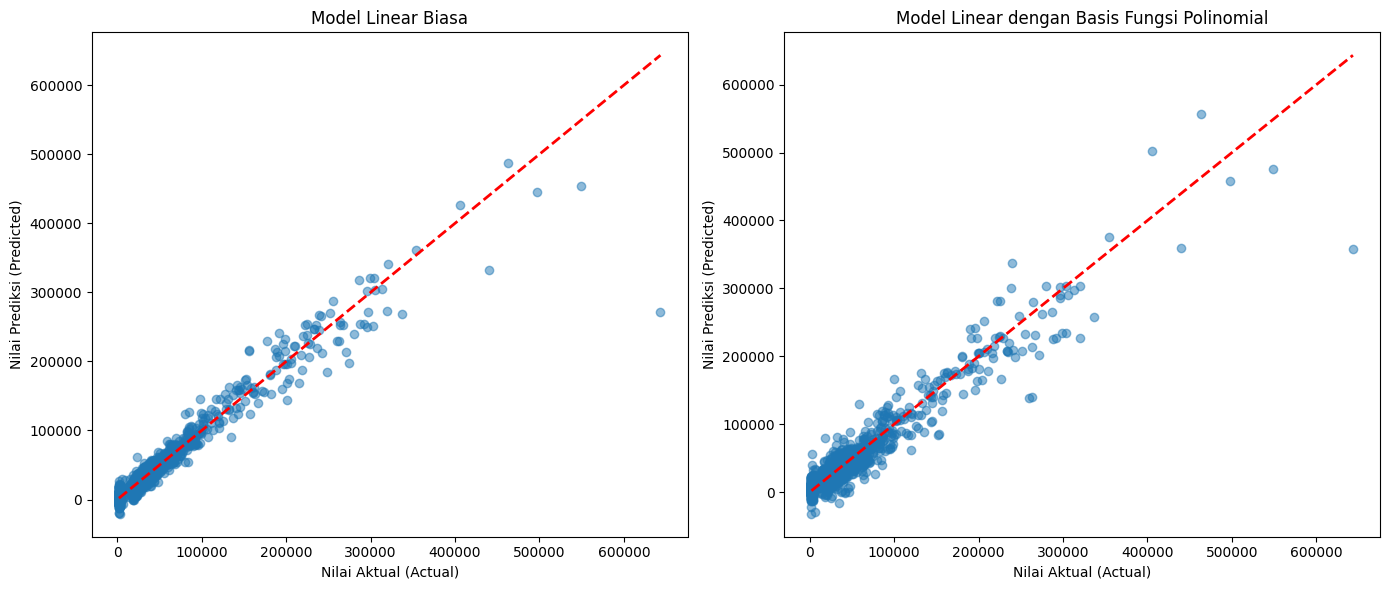

In [52]:
import matplotlib.pyplot as plt

# Membuat plot untuk model Linear Biasa dan Basis Fungsi Polinomial
plt.figure(figsize=(14, 6))

# Plot 1: Model Linear Biasa
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear, alpha=0.5)  # Menambahkan nilai alpha dengan benar
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Nilai Aktual (Actual)')
plt.ylabel('Nilai Prediksi (Predicted)')
plt.title('Model Linear Biasa')

# Plot 2: Model dengan Basis Fungsi Polinomial
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_poly, alpha=0.5)  # Menambahkan nilai alpha dengan benar
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Nilai Aktual (Actual)')
plt.ylabel('Nilai Prediksi (Predicted)')
plt.title('Model Linear dengan Basis Fungsi Polinomial')

# Tampilkan plot
plt.tight_layout()
plt.show()


Prompt: beri kode untuk memvisualkan regresi linear dengan basis fungsi dan biasa RMSE,MSE,RSquared,etc

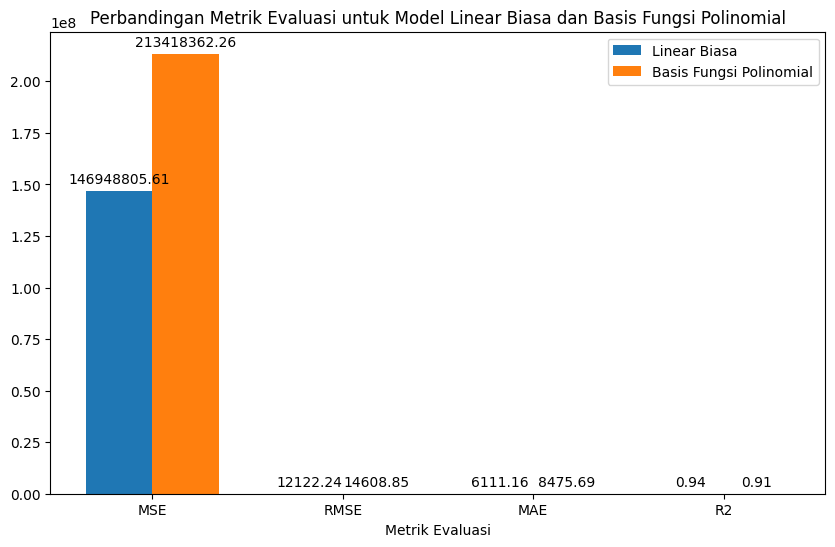

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Metrik evaluasi model linear biasa
metrics_linear = {
    "MSE": mean_squared_error(y_test, y_pred_linear),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_linear)),
    "MAE": mean_absolute_error(y_test, y_pred_linear),
    "R2": r2_score(y_test, y_pred_linear)
}

# Metrik evaluasi model linear dengan basis fungsi polinomial
metrics_poly = {
    "MSE": mean_squared_error(y_test, y_pred_poly),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_poly)),
    "MAE": mean_absolute_error(y_test, y_pred_poly),
    "R2": r2_score(y_test, y_pred_poly)
}

# Menyiapkan data untuk visualisasi
labels = list(metrics_linear.keys())
linear_values = list(metrics_linear.values())
poly_values = list(metrics_poly.values())

# Visualisasi menggunakan bar chart
x = np.arange(len(labels))  # Label untuk tiap metrik
width = 0.35  # Lebar tiap bar

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, linear_values, width, label='Linear Biasa')
rects2 = ax.bar(x + width/2, poly_values, width, label='Basis Fungsi Polinomial')

# Menambahkan judul dan label
ax.set_xlabel('Metrik Evaluasi')
ax.set_title('Perbandingan Metrik Evaluasi untuk Model Linear Biasa dan Basis Fungsi Polinomial')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Menampilkan nilai di atas setiap bar
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # Jarak teks dari bar
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)

plt.show()
